# SMOTE

Creates new samples by interpolation of samples of the minority class and any of its k nearest neighbours (also from the minority class). K is typically 5.

In [1]:
# import libraries

import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn 
from sklearn.datasets import make_blobs

# from imblearn
from imblearn.over_sampling import SMOTE

In [2]:
# creating toy dataset

X, y = make_blobs(n_samples=1600, n_features=2, centers=[(0,0),(5,5)], random_state= 42,  cluster_std=1.5)

X.shape, y.shape

((1600, 2), (1600,))

In [4]:
# creating a data frame 

X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

# now, under sample the data for y ==1 
X = pd.concat([X[y == 0], X[y==1].sample(200, random_state=42)], axis = 0)

y = y.loc[X.index]

# display the shape
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# check the value counts for the target class
y.value_counts()

0    800
1    200
dtype: int64

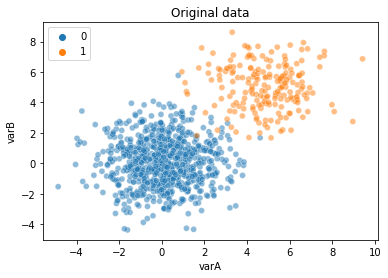

In [6]:
# plot the original data

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

## SMOTE - Synthetic Minority Over-sampling Technique 

[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [7]:
# create RandomSampler object

smote = SMOTE(sampling_strategy='auto', # samples from the minority class-- this is default
                        random_state=0,
             k_neighbors=5,
             n_jobs=2) 

X_resampled, y_resampled = smote.fit_resample(X,y)
X_resampled.shape, y_resampled.shape

((1600, 2), (1600,))

In [8]:
# original data shape
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# balance values
# original data
y.value_counts()

0    800
1    200
dtype: int64

In [10]:
y_resampled.value_counts()

0    800
1    800
dtype: int64

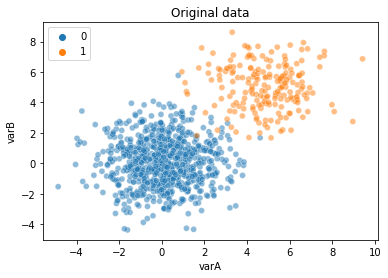

In [11]:
# plot the original data

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

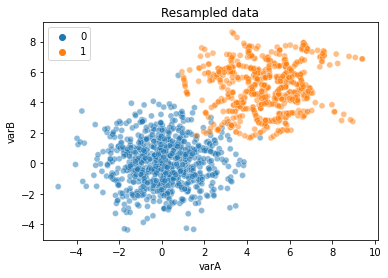

In [12]:
# plot the resampled data

# plot the original data

sns.scatterplot(data = X_resampled, x = 'varA', y = 'varB', hue = y_resampled, alpha=0.5)
plt.title('Resampled data')
plt.show()

- Here we can see more and new observations from the minority class - Class 0

## Multi Class Data

In [13]:
# create a multi class dataset

X, y = make_blobs(n_samples=1600,
           n_features=3,
           cluster_std=1.5,
           centers=[(0,0),(5,5),(-1,5)],
           random_state=42)

X.shape, y.shape

((1600, 2), (1600,))

In [14]:
# convert into a DataFrame and series
X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

# concat
X = pd.concat([X[y==0],
             X[y==1].sample(100, random_state=42),
             X[y==2].sample(100, random_state=42)],
             axis = 0)
y = y.loc[X.index]

X.shape, y.shape

((734, 2), (734,))

In [15]:
y.value_counts()

0    534
1    100
2    100
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

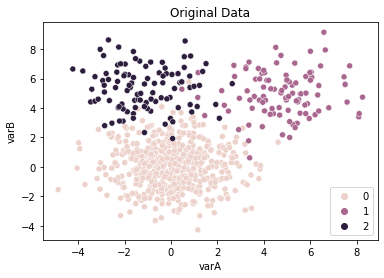

In [16]:
# plot

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = y)
plt.title('Original Data')
plt.show

In [17]:
## Perform Random Oversampling

smote = SMOTE(sampling_strategy='not majority', # samples from all class except the majority one
                       random_state=0,
             k_neighbors=5,
             n_jobs=2)

X_res, y_res = smote.fit_resample(X,y)
X_res.shape, y_res.shape

((1602, 2), (1602,))

In [18]:
y_res.value_counts()

0    534
1    534
2    534
dtype: int64

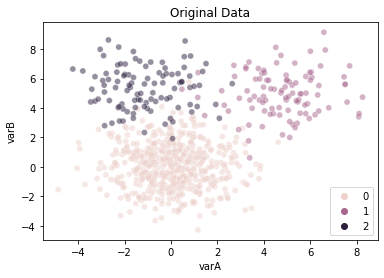

In [19]:
# plot

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = y, alpha = 0.5)
plt.title('Original Data')
plt.show()

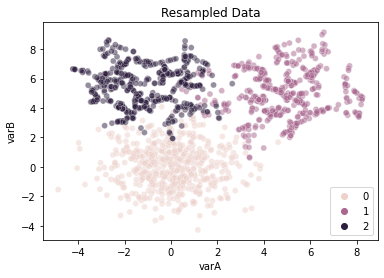

In [20]:
# Resampled

sns.scatterplot(data = X_res, x = 'varA', y ='varB', hue = y_res, alpha = 0.5)
plt.title('Resampled Data')
plt.show()

- Similarly, we can see new and more observations for classes 1 and 2 which contains over sampled observations

In [2]:
# trying with some data set from imblearn

from imblearn.datasets import fetch_datasets

In [3]:
data = fetch_datasets()['ecoli']
data

{'data': array([[0.49, 0.29, 0.48, ..., 0.56, 0.24, 0.35],
        [0.07, 0.4 , 0.48, ..., 0.54, 0.35, 0.44],
        [0.56, 0.4 , 0.48, ..., 0.49, 0.37, 0.46],
        ...,
        [0.61, 0.6 , 0.48, ..., 0.44, 0.39, 0.38],
        [0.59, 0.61, 0.48, ..., 0.42, 0.42, 0.37],
        [0.74, 0.74, 0.48, ..., 0.31, 0.53, 0.52]]),
 'target': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

In [4]:
colummns = list(map(str, list(range(len(data.data[0][:])))))
colummns

['0', '1', '2', '3', '4', '5', '6']

In [6]:
X= pd.DataFrame(data = data.data, columns=colummns)
y = pd.Series(data.target)
X.head()


,0,1,2,3,4,5,6
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35


In [7]:
df = pd.concat([X, y], axis = 1)
df['target'] = y
df

,0,1,2,3,4,5,6,0,target
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,-1,-1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,-1,-1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,-1,-1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,-1,-1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,-1,-1
...,...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,-1,-1
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,-1,-1
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,-1,-1
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,-1,-1


In [8]:
df.isnull()

,0,1,2,3,4,5,6,0,target
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
331,False,False,False,False,False,False,False,False,False
332,False,False,False,False,False,False,False,False,False
333,False,False,False,False,False,False,False,False,False
334,False,False,False,False,False,False,False,False,False


In [9]:
df['target'].value_counts()

-1    301
 1     35
Name: target, dtype: int64

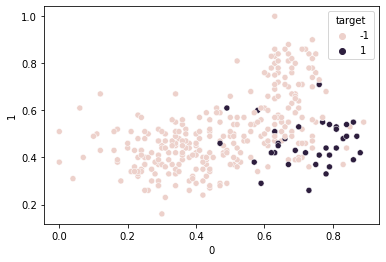

In [10]:
#plotting original distribution for say columns 0 and 1

sns.scatterplot(data = df, x = '0', y ='1', hue ='target')
plt.show()

In [11]:
# appllying SMOTE to increase the observations from minorty classes
smo = SMOTE(sampling_strategy='not majority',
           k_neighbors=5,
           n_jobs=2,
           random_state=0)

X_res, y_res = smo.fit_resample(df.drop('target', axis = 1), df['target'])
X_res.shape, y_res.shape

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


((602, 8), (602,))

In [12]:
y_res.value_counts()

-1    301
 1    301
Name: target, dtype: int64

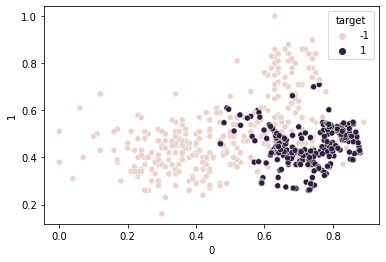

In [13]:
#plotting original distribution for say columns 0 and 1

sns.scatterplot(data = X_res, x = '0', y ='1', hue =y_res)
plt.show()

### Training RF Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [15]:
def run_model(X, y):
    
    rf = RandomForestClassifier(n_estimators=20, max_depth=4, n_jobs=2,)

    rf.fit(X,y)
    preds = rf.predict_proba(X)
    return preds

In [26]:
# originald data
X = df.drop('target', axis = 1)
y = df['target']

In [27]:
preds = run_model(X,y)
preds

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[0.99883041, 0.00116959],
       [0.99168755, 0.00831245],
       [0.99774345, 0.00225655],
       [0.99883041, 0.00116959],
       [0.99883041, 0.00116959],
       [0.98891992, 0.01108008],
       [0.98216374, 0.01783626],
       [0.99774345, 0.00225655],
       [0.99883041, 0.00116959],
       [0.99883041, 0.00116959],
       [1.        , 0.        ],
       [0.99883041, 0.00116959],
       [0.99774345, 0.00225655],
       [0.99883041, 0.00116959],
       [0.99883041, 0.00116959],
       [0.99774345, 0.00225655],
       [0.99883041, 0.00116959],
       [0.99883041, 0.00116959],
       [0.99774345, 0.00225655],
       [1.        , 0.        ],
       [0.99883041, 0.00116959],
       [1.        , 0.        ],
       [0.99883041, 0.00116959],
       [0.99883041, 0.00116959],
       [0.98216374, 0.01783626],
       [0.99774345, 0.00225655],
       [0.99774345, 0.00225655],
       [0.99883041, 0.00116959],
       [0.99774345, 0.00225655],
       [0.99774345, 0.00225655],
       [0.

In [28]:
roc_auc_score(y, preds[:,1])

1.0

In [29]:
# for resampled data
preds_2 = run_model(X_res, y_res)
preds_2

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[0.98529412, 0.01470588],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.02473227, 0.97526773],
       [0.05215801, 0.94784199],
       [0.03967179, 0.96032821]])

In [31]:
roc_auc_score(y_res, preds_2[:,1])

1.0

- Cannot see much difference in the performance between these two datasets